## Lending_Club_Loan_Default_Prediction_Model_V1

## Introduction: 
> Lending club is a U.S based peer-to-peer lending platform. It connects individual borrowers to individual investor-lenders through online platforms. Investors are able to search and browse the loan listings on LendingClub website and select loans that they wante to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose, etc. Investors make money from the interest on these loans. LendingClub make money by charging borrowers an origination fee and investors a service fee. 

## Project objective:
> The aim of this project is to predict the chance that a loan will charge off, i.e., the customers who are not able to pay back the loan amount. Since customers who don't pay back their loan amount are a source of loss for the company, we want to build a machine learning model based on 12 years (2007-2019) of accepted loan applications data, which can predict if a particular applicant will or will not be able to payback the loan amount. The problem will be treated as a binary classification problem i.e. default or not default and a suitable predictive model is built.

## 1. Loading & Reading Data

In [1]:
# Importing neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('accepted_2007_to_2018Q4.csv',sep=',', low_memory=False )

In [3]:
df.shape

(2260701, 151)

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #    Column                                      Non-Null Count    Dtype  
---   ------                                      --------------    -----  
 0    id                                          2260701 non-null  object 
 1    member_id                                   0 non-null        float64
 2    loan_amnt                                   2260668 non-null  float64
 3    funded_amnt                                 2260668 non-null  float64
 4    funded_amnt_inv                             2260668 non-null  float64
 5    term                                        2260668 non-null  object 
 6    int_rate                                    2260668 non-null  float64
 7    installment                                 2260668 non-null  float64
 8    grade                                       2260668 non-null  object 
 9    sub_grade                                   

## 2. Missing Value Analysis

In [6]:
# Missing values per column expressed as percentage of total number of values

df.isnull().mean()*100

id                         0.00000
member_id                100.00000
loan_amnt                  0.00146
funded_amnt                0.00146
funded_amnt_inv            0.00146
                           ...    
settlement_status         98.48516
settlement_date           98.48516
settlement_amount         98.48516
settlement_percentage     98.48516
settlement_term           98.48516
Length: 151, dtype: float64

<AxesSubplot:>

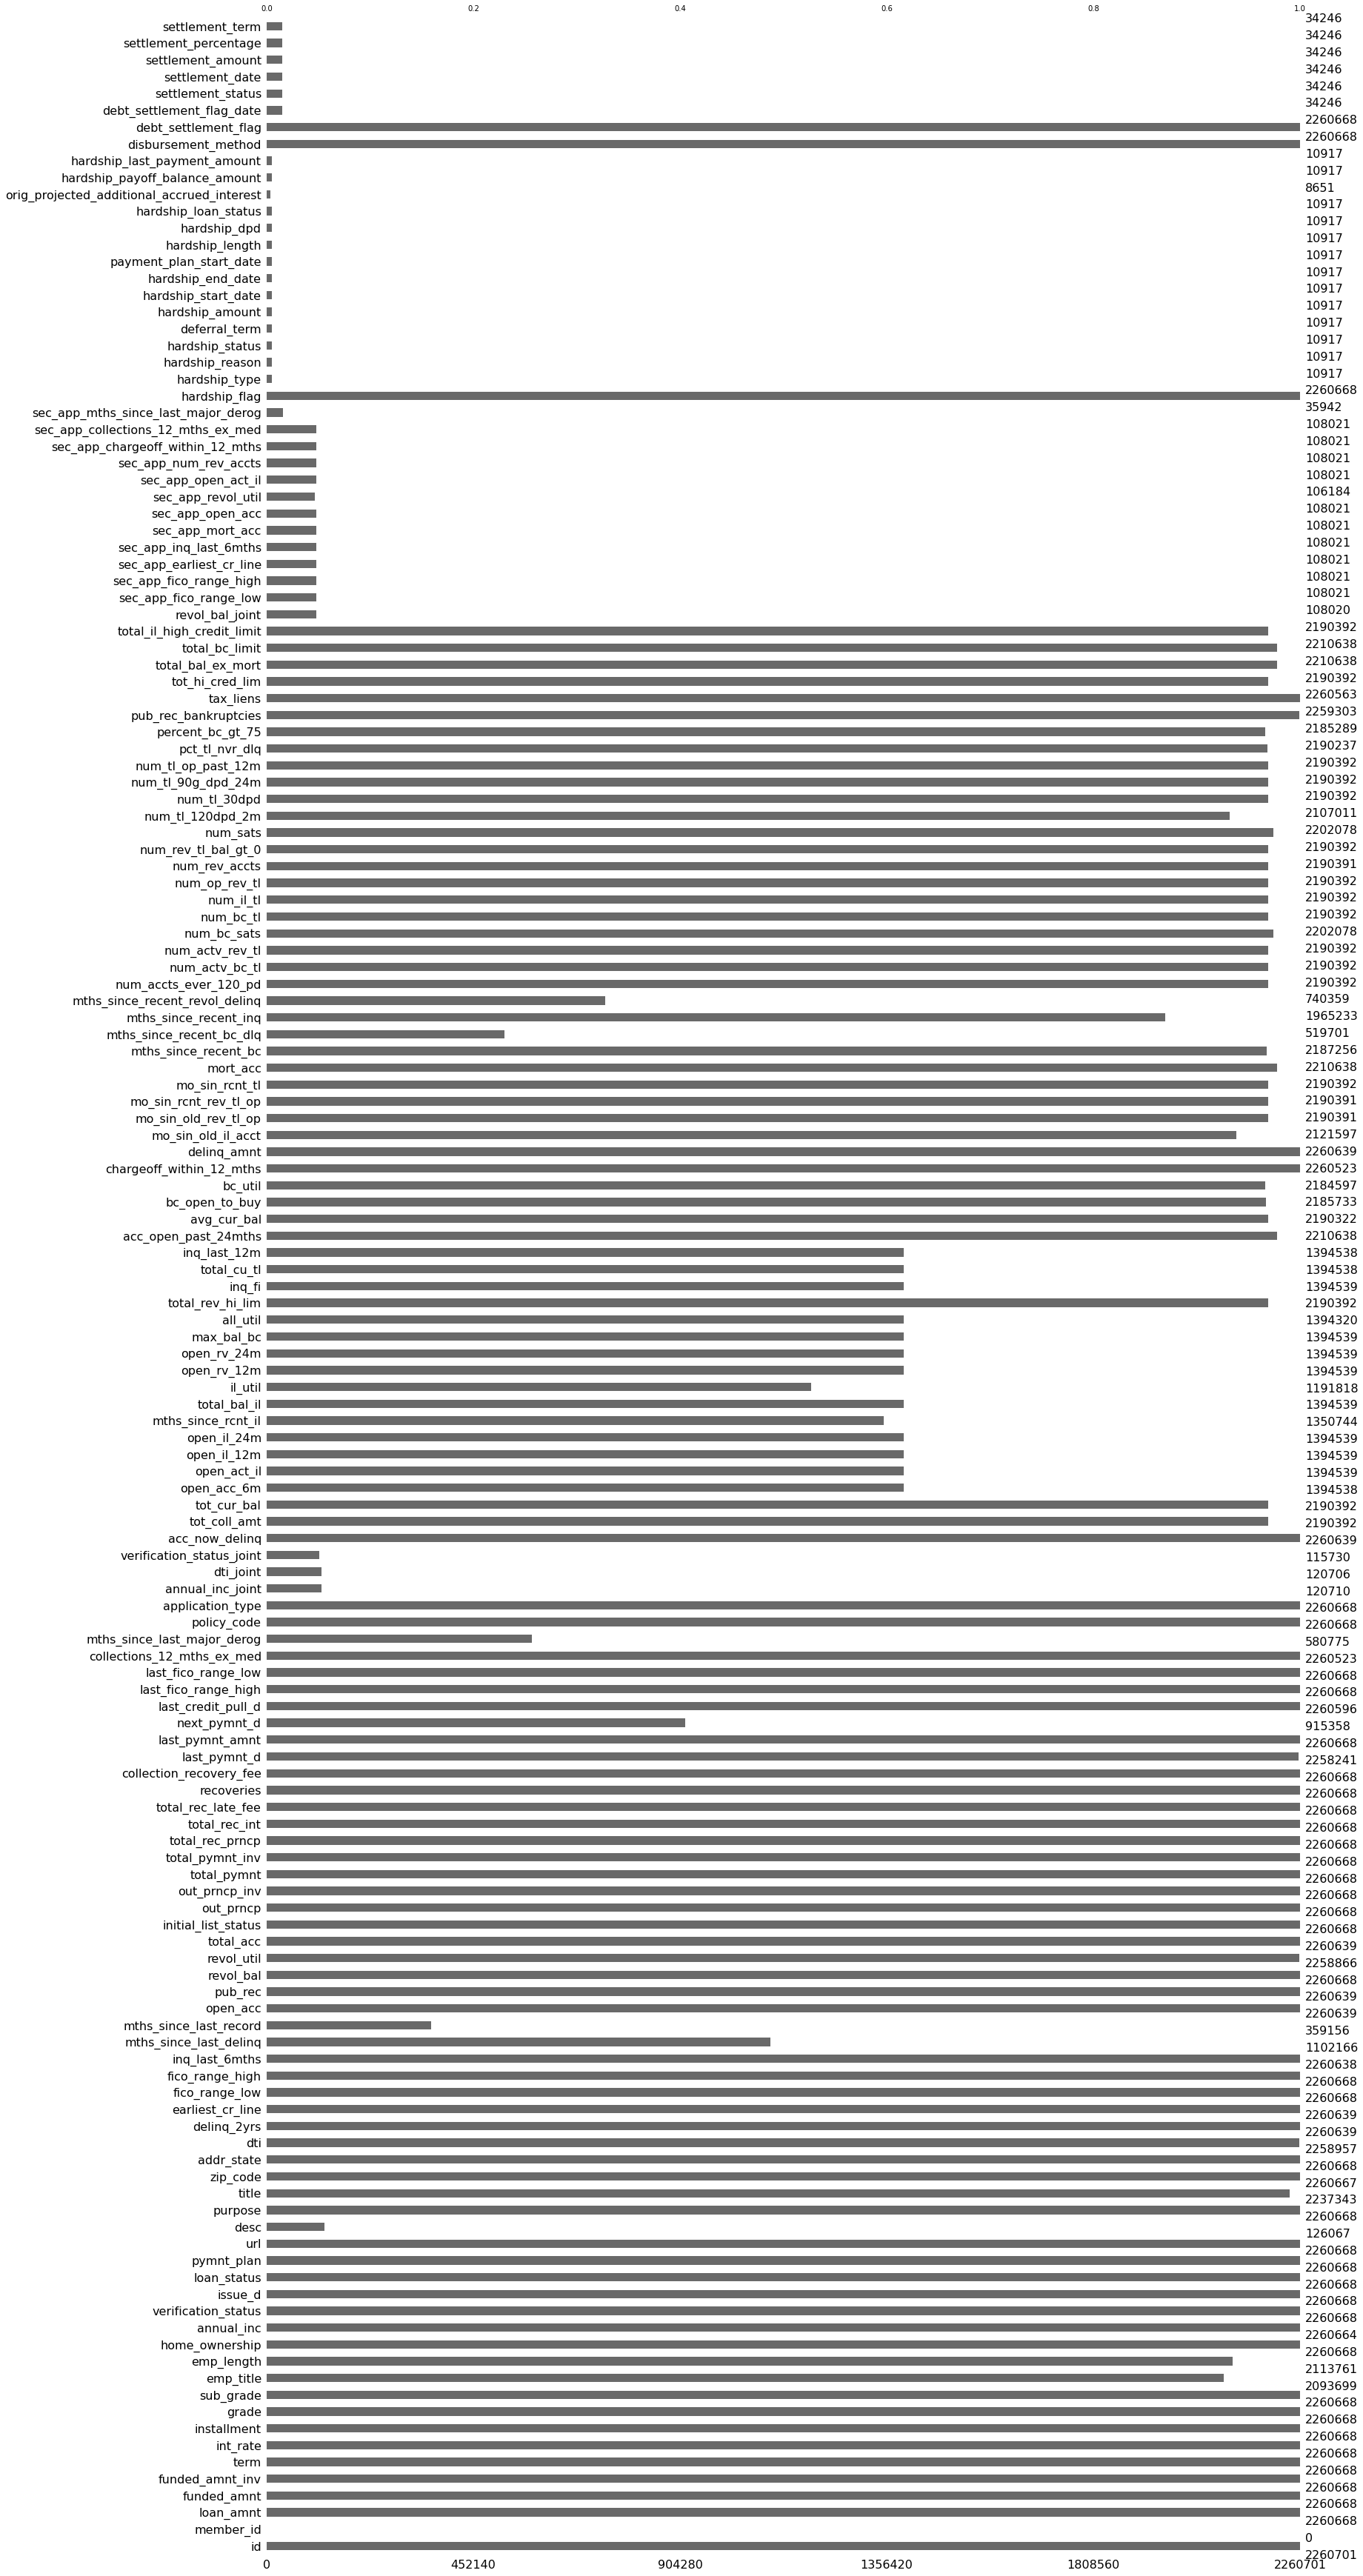

In [7]:
# Using missingno package to visualize the number of missing values per column

import missingno as msno
msno.bar(df)

In [8]:
# There are many columns in the data with 100% missing values. 
# Lets check and remove all the columns with more than 60% missing values.

check = df.isnull().sum() / len(df) 
cols = check[check > 0.6].index

In [9]:
len(cols)

42

In [10]:
print(list(cols))

['member_id', 'desc', 'mths_since_last_record', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', 

In [11]:
# Checking if there is any randomness in missing values or not for above columns
# MAR/MNAR analysis

df_max_null = df[['member_id', 'desc', 'mths_since_last_record', 'mths_since_last_major_derog',
                  'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'mths_since_recent_bc_dlq',
                  'mths_since_recent_revol_delinq', 'revol_bal_joint', 'sec_app_fico_range_low',
                  'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
                  'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il',
                  'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med',
                  'sec_app_mths_since_last_major_derog', 'hardship_type', 'hardship_reason', 'hardship_status',
                  'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date',
                  'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status',
                  'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount',
                  'hardship_last_payment_amount', 'debt_settlement_flag_date', 'settlement_status',
                  'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term']]

<AxesSubplot:>

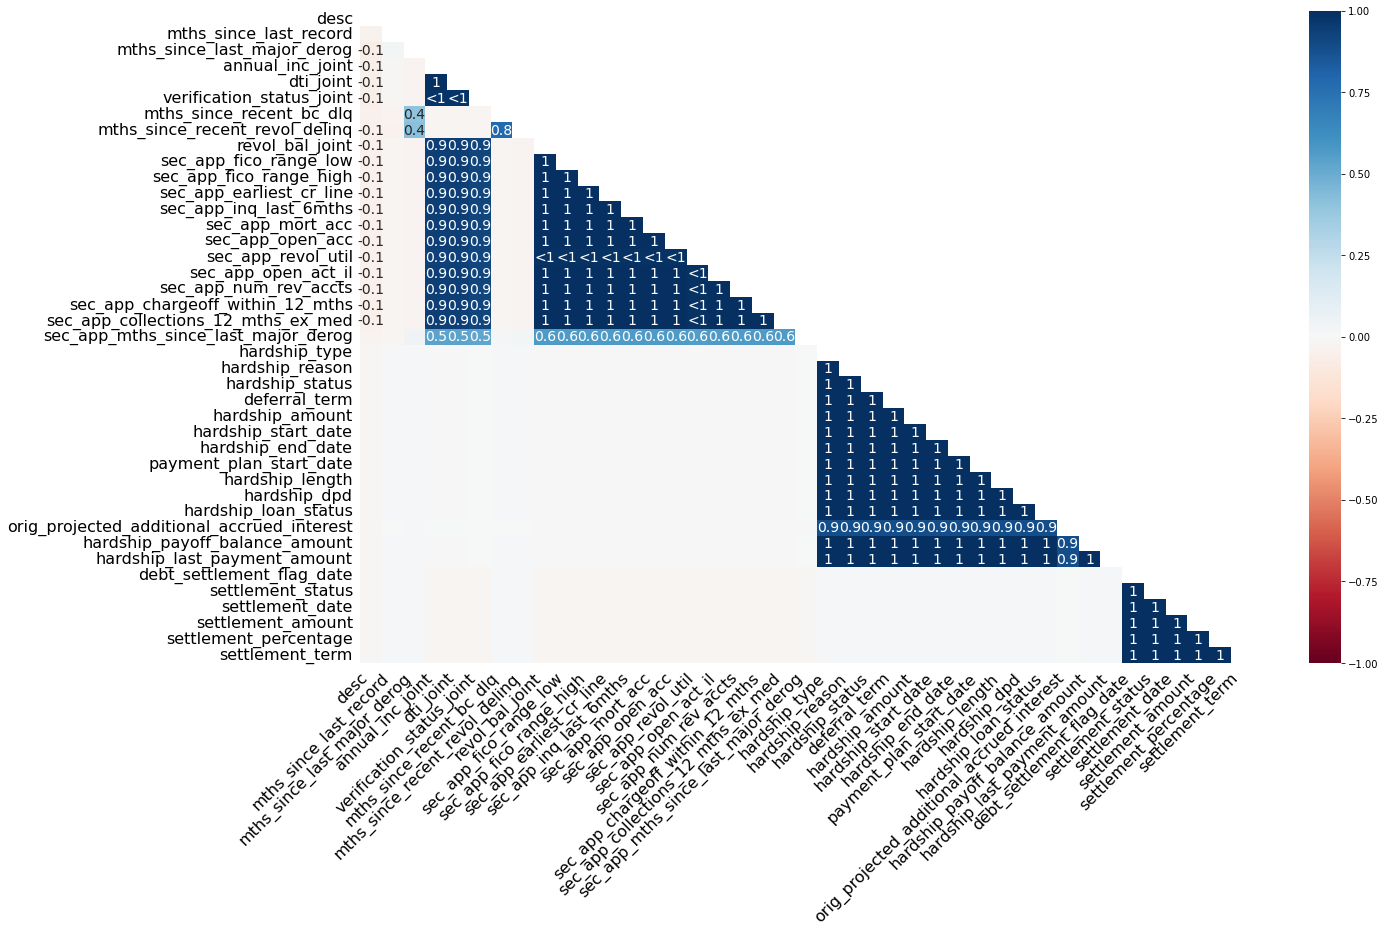

In [12]:
# Heatmap to check the nullity relationship between different variables

msno.heatmap(df_max_null)

> So all the columns in the above list with null values more than 60%, seems to have no relationships with null values of other columns. Columns within one category are only showing high correlation, i.e. columns within hardship data or columns within settlement or secondary applicant data, So these can be considered as MAR (Missing at random) cases. But it will be interesting to know why these category of data are mostly missing. For our further analysis we can directly drop these columns with more than 60% null values.

In [13]:
df.drop(['member_id', 'desc', 'mths_since_last_record', 'mths_since_last_major_derog',
                  'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'mths_since_recent_bc_dlq',
                  'mths_since_recent_revol_delinq', 'revol_bal_joint', 'sec_app_fico_range_low',
                  'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
                  'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il',
                  'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med',
                  'sec_app_mths_since_last_major_derog', 'hardship_type', 'hardship_reason', 'hardship_status',
                  'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date',
                  'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status',
                  'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount',
                  'hardship_last_payment_amount', 'debt_settlement_flag_date', 'settlement_status',
                  'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term'],axis=1, inplace=True)

## 3. Removing other irrelevant columns

In [14]:
drop_list = ['url','addr_state','zip_code','funded_amnt','funded_amnt_inv','int_rate',
             'sub_grade','emp_title','issue_d','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
            'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt']

> sub_grade — contains redundant information that is already in the grade column, int_rate — also included within the grade column, emp_title — requires other data and a lot of processing to become potentially useful, zip_code – mostly redundant with the addr_state column since only the first 3 digits of the 5 digit zip code are visible. Rest of the columns like funded_amnt, out_prncp, total_pymnt, etc. are all cases of data leakage. A column is considered to leak information when the data it contains won’t be available when we use our model to make predictions.

In [15]:
df = df.drop(drop_list, axis=1)

In [16]:
df.shape

(2260701, 90)

In [17]:
# Investigating FICO Score columns
# fico_range_low, fico_range_high, last_fico_range_low, and last_fico_range_high

print(df['fico_range_low'].unique())
print(df['fico_range_high'].unique())

[675. 715. 695. 785. 690. 680. 705. 685. 700. 710. 720. 665. 745. 800.
 725. 835. 780. 660. 730. 750. 670. 740. 755. 795. 775. 770. 765. 735.
 790. 815. 845. 760. 805. 810. 825. 820. 840. 830.  nan 630. 625. 650.
 655. 645. 640. 635. 610. 620. 615.]
[679. 719. 699. 789. 694. 684. 709. 689. 704. 714. 724. 669. 749. 804.
 729. 839. 784. 664. 734. 754. 674. 744. 759. 799. 779. 774. 769. 739.
 794. 819. 850. 764. 809. 814. 829. 824. 844. 834.  nan 634. 629. 654.
 659. 649. 644. 639. 614. 624. 619.]


2260701
2260668


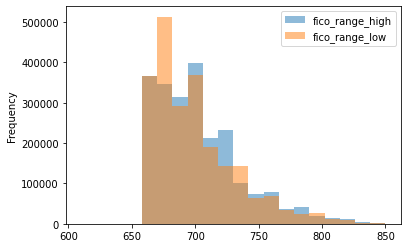

In [18]:
fico_columns = ['fico_range_high','fico_range_low']
print(df.shape[0])
df.dropna(subset=fico_columns,inplace=True)
print(df.shape[0])
df[fico_columns].plot.hist(alpha=0.5,bins=20);

> Here we are trying to create a column for the average of fico_range_low and fico_range_high columns and name it fico_average. Note that this is not the average FICO score for each borrower, but rather an average of the high and low range that we know the borrower is in.

In [19]:
df['fico_average'] = (df['fico_range_high'] + df['fico_range_low']) / 2
cols = ['fico_range_low','fico_range_high','fico_average']
df[cols].head()

,fico_range_low,fico_range_high,fico_average
0,675.0,679.0,677.0
1,715.0,719.0,717.0
2,695.0,699.0,697.0
3,785.0,789.0,787.0
4,695.0,699.0,697.0


> We got the mean calculations and everything right. Now, we can go ahead and drop fico_range_low, fico_range_high, last_fico_range_low, and last_fico_range_high columns

In [20]:
drop_cols = ['fico_range_low','fico_range_high','last_fico_range_low', 'last_fico_range_high']
df = df.drop(drop_cols, axis=1)
df.shape

(2260668, 87)

In [21]:
df.policy_code.unique()

array([1.])

In [22]:
# value for entire dataset is '1', 
# indicating all are publicly available, therefore nothing to contribute for analysis, so this feature can be removed

df.drop('policy_code',axis=1,inplace=True)

In [23]:
# Some other columns of future leak that can be dropped

df.drop('debt_settlement_flag',axis=1, inplace=True)
df.drop('disbursement_method',axis=1, inplace=True)

## 4. Data Slicing

> Here we are trying to reduce the number of rows of data or create some meaningful sample of data on which we can work on building our prediction model

### 4.1 Based on Target Variable 

In [24]:
# Our target variable is loan_status

df.loan_status.unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

> Fully paid: The loan has been repaid in full,
> Current: The loan is still being paid,
> Charged off: The loan has been in default for more than 30 days and no future payments are expected,
> In Grace Period,
> Late (16-30), (31-120) days: Loan has not been current for these days,
> Default: Loan has not been paid in 121 or more days,
> Does not meet the credit policy. Status:Fully Paid,
> Does not meet the credit policy. Status:Charged Off

> As per our business problem, we will club 'Fully paid' and 'Does not meet the credit policy Status:Fully Paid'. And 'Charged off' and 'Does not meet the credit policy Status:Charged Off' and 'Default'. Rest all the cases are 'current' and should be dropped from our analysis

In [25]:
mapping_dict = {'loan_status':{'Fully Paid':0, 'Does not meet the credit policy. Status:Fully Paid':0,
                               'Charged Off': 1,'Does not meet the credit policy. Status:Charged Off':1,
                               'Default': 1,'Current':2,'Late (31-120 days)': 2,'Late (16-30 days)':2,'In Grace Period':2}}
df = df.replace(mapping_dict)

In [26]:
# Removing loan_status = 2

df.drop(df[df['loan_status'] == 2].index, inplace = True)

In [27]:
df.shape

(1348099, 84)

### 4.2 Based on % yearly Defaults

> Here we are Checking if the number of defaults is uniform over the years. If there is significant difference, those years of data with significantly high % defaullts can be removed, to remove possible bias. We will use last_payment_date to get the default year or year in which the default has been made

In [28]:
df['last_pymnt_yr'] = pd.DatetimeIndex(df['last_pymnt_d']).year

In [29]:
year_wise_loan_dfst=df.pivot_table(index='last_pymnt_yr', columns='loan_status', values='id', aggfunc='count').fillna(0)
year_wise_loan_dfst['default_percent']=year_wise_loan_dfst[1]/(year_wise_loan_dfst[0]+year_wise_loan_dfst[1])
year_wise_loan_dfst = pd.DataFrame(year_wise_loan_dfst.to_records())
year_wise_loan_dfst

,last_pymnt_yr,0,1,default_percent
0,2007.0,1,1,0.500000
1,2008.0,150,185,0.552239
2,2009.0,449,389,0.464200
3,2010.0,1740,680,0.280992
4,2011.0,4559,1189,0.206855
5,2012.0,9175,2638,0.223313
6,2013.0,20730,6464,0.237699
7,2014.0,51655,14956,0.224527
8,2015.0,116843,31617,0.212966
9,2016.0,184117,60775,0.248171


<AxesSubplot:xlabel='last_pymnt_yr', ylabel='default_percent'>

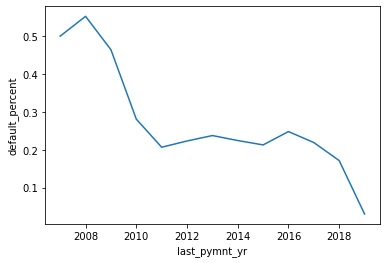

In [30]:
# Plotting percentage defaults year wise

sns.lineplot(data=year_wise_loan_dfst, x="last_pymnt_yr", y="default_percent", markers=True)

> So, 2007-2009 seems to have large defaults (aroud 50%) possibly due to global recession. No. of defaults is in normal range from 2010 to 2016, then decreasing sharply.For our convenience of running the model on a small sample, we will consider only the years from 2010-2014

In [31]:
df1=df.copy()

In [32]:
#df = df.drop(df[df['last_pymnt_yr']] <= 2010 & df[df['last_pymnt_yr']] >= 2014)
df1.drop(df1[df1['last_pymnt_yr'] <2010.0].index, inplace=True)
df1.drop(df1[df1['last_pymnt_yr'] >2014.0].index, inplace=True)
df1.shape

(116111, 85)

### 4.3 Removing rows where the corresponding columns have less than 5% null values 

In [33]:
check = df1.isnull().sum() / len(df1)
cols_1 = check[check <= 0.05].index
cols_1

Index(['id', 'loan_amnt', 'term', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'hardship_flag',
       'fico_average', 'last_pymnt_yr'],
      dtype='object')

In [34]:
df1.dropna(subset=cols_1,inplace=True)

In [35]:
df1.shape

(108861, 85)

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108861 entries, 1117896 to 1939376
Data columns (total 85 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          108861 non-null  object 
 1   loan_amnt                   108861 non-null  float64
 2   term                        108861 non-null  object 
 3   installment                 108861 non-null  float64
 4   grade                       108861 non-null  object 
 5   emp_length                  108861 non-null  object 
 6   home_ownership              108861 non-null  object 
 7   annual_inc                  108861 non-null  float64
 8   verification_status         108861 non-null  object 
 9   loan_status                 108861 non-null  int64  
 10  pymnt_plan                  108861 non-null  object 
 11  purpose                     108861 non-null  object 
 12  title                       108861 non-null  object 
 13  dti    

> We observe that a lot of columns are now totally null or a lot of null values are there in them, after we subsetted the data from 2010-2014. We can take suitable action to remove or treat these columns.

In [37]:
# Again removing columns with more than 50% missing values from subset data

cols_2 = check[check >= 0.4].index
cols_2

Index(['mths_since_last_delinq', 'next_pymnt_d', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'avg_cur_bal', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'tot_hi_cred_lim', 'total_il_high_credit_limit'],
      dtype='object')

In [38]:
len(cols_2)

40

In [39]:
df1 = df1.drop(cols_2, axis=1)
df1.shape

(108861, 45)

In [40]:
df1.columns

Index(['id', 'loan_amnt', 'term', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'acc_open_past_24mths',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mort_acc', 'mths_since_recent_bc', 'num_bc_sats', 'num_sats',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'total_bal_ex_mort', 'total_bc_limit', 'hardship_flag', 'fico_average',
       'last_pymnt_yr'],
      dtype='object')

## 5. Exploratory Data Analysis

> Here we will perform some univariate, bivariate analysis to understand the frequency distribution of variables and their relationships with each other. With the help of some charts, we will try to understand some variables in terms of their level proportions. Goal is to understand data distribution in each feature to understand how to impute remaining missing values

array([[<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'installment'}>,
        <AxesSubplot:title={'center':'annual_inc'}>,
        <AxesSubplot:title={'center':'loan_status'}>,
        <AxesSubplot:title={'center':'dti'}>],
       [<AxesSubplot:title={'center':'delinq_2yrs'}>,
        <AxesSubplot:title={'center':'inq_last_6mths'}>,
        <AxesSubplot:title={'center':'open_acc'}>,
        <AxesSubplot:title={'center':'pub_rec'}>,
        <AxesSubplot:title={'center':'revol_bal'}>],
       [<AxesSubplot:title={'center':'revol_util'}>,
        <AxesSubplot:title={'center':'total_acc'}>,
        <AxesSubplot:title={'center':'collections_12_mths_ex_med'}>,
        <AxesSubplot:title={'center':'acc_now_delinq'}>,
        <AxesSubplot:title={'center':'acc_open_past_24mths'}>],
       [<AxesSubplot:title={'center':'bc_open_to_buy'}>,
        <AxesSubplot:title={'center':'bc_util'}>,
        <AxesSubplot:title={'center':'chargeoff_within_12_mths'}>,
      

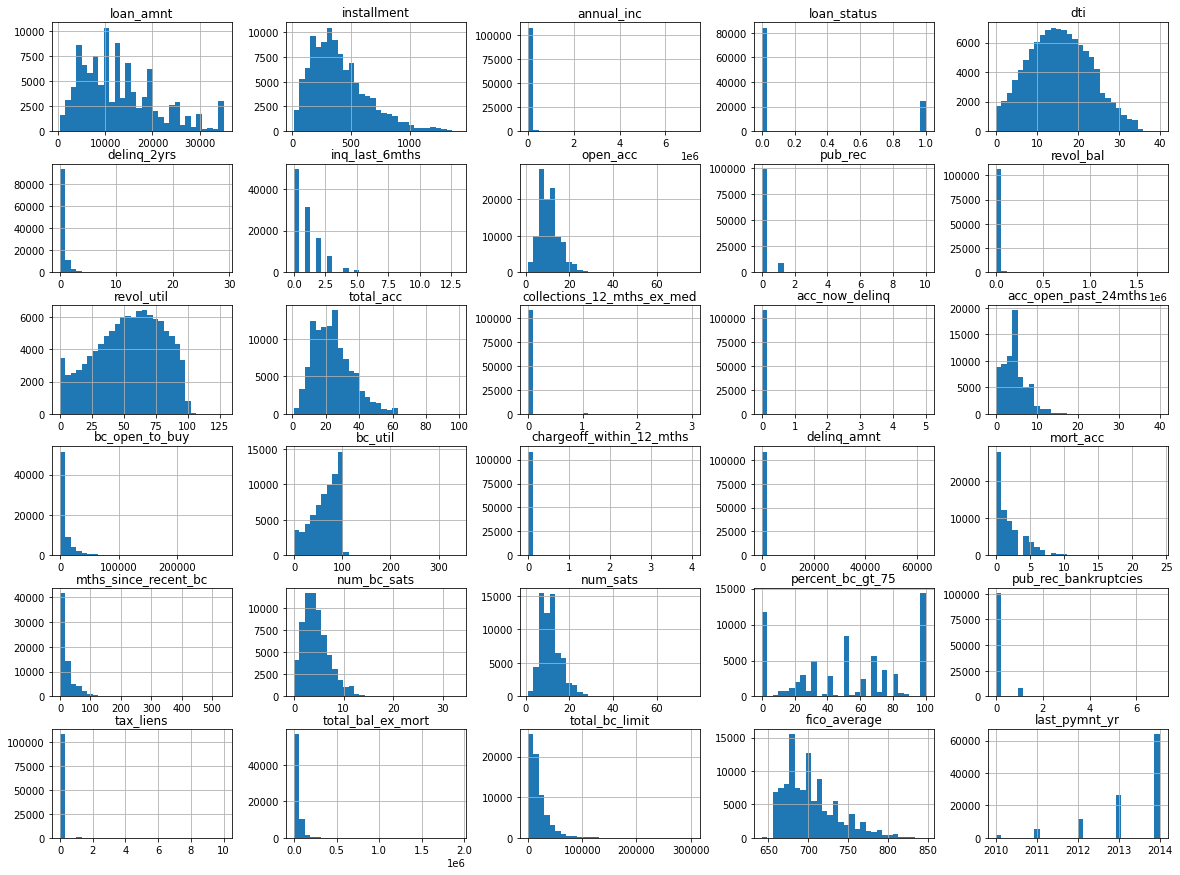

In [41]:
df1.hist(bins=30, figsize=(20, 15))

> From the above histogram plot, we can observe wether the distribution of a variable is normal or skewed or non-uniform. We can use this information for neccessary imputations. For e.g in case of normal distributions, mean vaulue can be used for imputing null values, while in case of skewed data, some other parameter like median or mode can be used. We can see columns like dti, num_bc_seats and total_acc are normally distributed. 

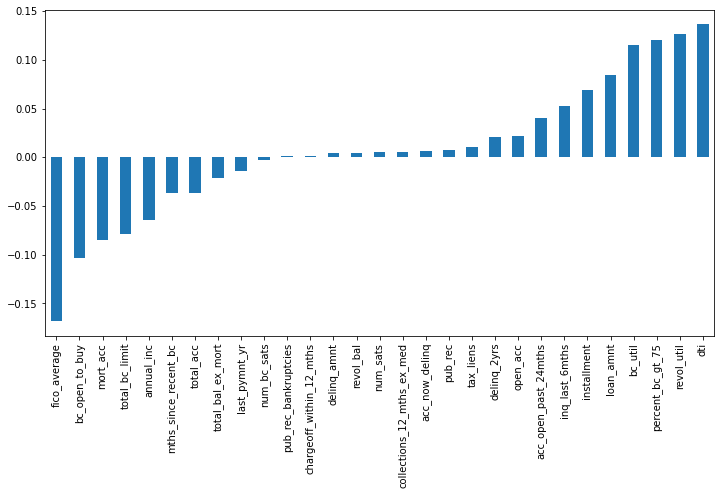

In [42]:
# Correlation of the numeric features to the loan_status column

plt.figure(figsize = (12,6))
df1.corr()['loan_status'].sort_values().drop('loan_status').plot(kind='bar')
plt.show()

> Above correlation bar plot gives us the information about the strength of relationships (also positive or negative) between independent and target variable (loan_status). We can see that grade and fico_average have the most negative and revol_util and dti have the most positive correlation with loan_status.

In [43]:
# Checking the remaining null values column wise

df1.isnull().sum()

id                                0
loan_amnt                         0
term                              0
installment                       0
grade                             0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
loan_status                       0
pymnt_plan                        0
purpose                           0
title                             0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
initial_list_status               0
last_pymnt_d                      0
last_credit_pull_d                0
collections_12_mths_ex_med        0
application_type                  0
acc_now_delinq              

In [44]:
missing_valued_col= ["acc_open_past_24mths",
             "bc_open_to_buy",
             "bc_util",
             "mort_acc",
             "mths_since_recent_bc",
             "num_bc_sats",
             "num_sats",
             "percent_bc_gt_75",
             "total_bal_ex_mort",
             "total_bc_limit"]

In [45]:
# Performing some descriptive statistics to understand the columns with msiisng values

statistics = pd.DataFrame(columns = ["method", "mean", "median", "mode", "min", "max", "range", "MAD", "variance", "SD", "CV"])
statistics["method"] = missing_valued_col
for idx, column in enumerate(missing_valued_col):
    statistics.loc[idx, "mean"] = df[column].mean()
    statistics.loc[idx, "median"] = df[column].median()
    statistics.loc[idx, "mode"] = df[column].mode()[0]    
    statistics.loc[idx, "min"] = df[column].min()
    statistics.loc[idx, "max"] = f"{df[column].max():.0f}"
    statistics.loc[idx, "range"] = f"{df[column].max() - df[column].min():.0f}"
    statistics.loc[idx, "MAD"] = f"{df[column].mad():.0f}"
    statistics.loc[idx, "variance"] = f"{df[column].var():.0f}"
    statistics.loc[idx, "SD"] = df[column].std()
    statistics.loc[idx, "CV"] = df[column].std() / df[column].mean()  
statistics

,method,mean,median,mode,min,max,range,MAD,variance,SD,CV
0,acc_open_past_24mths,4.692894,4.0,3.0,0.0,64,64,2,10,3.18691,0.679093
1,bc_open_to_buy,10186.245525,4700.0,0.0,0.0,559912,559912,9707,235644942,15350.730994,1.507006
2,bc_util,59.939253,63.2,0.0,0.0,340,340,24,801,28.293192,0.472031
3,mort_acc,1.670769,1.0,0.0,0.0,51,51,2,4,2.000441,1.197318
4,mths_since_recent_bc,23.817781,13.0,3.0,0.0,639,639,20,945,30.733747,1.29037
5,num_bc_sats,4.734222,4.0,3.0,0.0,63,63,2,9,2.952404,0.62363
6,num_sats,11.639063,11.0,9.0,0.0,90,90,4,30,5.482548,0.471047
7,percent_bc_gt_75,45.155614,42.9,0.0,0.0,100,100,31,1297,36.007221,0.797403
8,total_bal_ex_mort,49666.245464,37295.0,0.0,0.0,3408095,3408095,31021,2279455011,47743.638431,0.961289
9,total_bc_limit,21633.934895,15100.0,0.0,0.0,1105500,1105500,14909,464602699,21554.644499,0.996335


In [46]:
# Checking percentage of missing values in columns

df1.isnull().mean()*100

id                             0.000000
loan_amnt                      0.000000
term                           0.000000
installment                    0.000000
grade                          0.000000
emp_length                     0.000000
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
purpose                        0.000000
title                          0.000000
dti                            0.000000
delinq_2yrs                    0.000000
earliest_cr_line               0.000000
inq_last_6mths                 0.000000
open_acc                       0.000000
pub_rec                        0.000000
revol_bal                      0.000000
revol_util                     0.000000
total_acc                      0.000000
initial_list_status            0.000000
last_pymnt_d                   0.000000
last_credit_pull_d             0.000000


## 6. Missing Value treatment and Required imputation

In [47]:
# Understanding the distribution of different values in Mortgage_Acc variable

df1['mort_acc'].value_counts(dropna=False)

NaN     38998
0.0     28010
1.0     12088
2.0      9192
3.0      6689
4.0      5169
5.0      3552
6.0      2215
7.0      1372
8.0       683
9.0       394
10.0      216
11.0      124
12.0       61
13.0       32
15.0       18
14.0       16
19.0        7
16.0        7
18.0        7
17.0        4
20.0        2
24.0        2
22.0        2
23.0        1
Name: mort_acc, dtype: int64

In [48]:
# Since this column is skewed, its better to use median value for imputing nulls

df1["mort_acc"].fillna(df1["mort_acc"].median(), inplace = True)

In [49]:
# Checking the values after imputation

df1['mort_acc'].value_counts(dropna=False)

1.0     51086
0.0     28010
2.0      9192
3.0      6689
4.0      5169
5.0      3552
6.0      2215
7.0      1372
8.0       683
9.0       394
10.0      216
11.0      124
12.0       61
13.0       32
15.0       18
14.0       16
19.0        7
16.0        7
18.0        7
17.0        4
20.0        2
24.0        2
22.0        2
23.0        1
Name: mort_acc, dtype: int64

In [50]:
df1['term'] = df1.term.apply(lambda x: x.split()[0])

In [51]:
df1.head(2)

,id,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,num_bc_sats,num_sats,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,hardship_flag,fico_average,last_pymnt_yr
1117896,37831144,2500.0,36,83.03,B,10+ years,RENT,59000.0,Verified,0,...,3.0,5.0,0.0,0.0,0.0,1646.0,2900.0,N,662.0,2014.0
1120851,37167359,6000.0,36,183.87,A,9 years,MORTGAGE,95000.0,Not Verified,0,...,4.0,6.0,0.0,0.0,0.0,6030.0,63800.0,N,792.0,2014.0


In [52]:
# Cleaning employee_length column, Removing 'years' using Reg_exp

df1["emp_length"] = df1["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
df1["emp_length"] = df1["emp_length"].apply(lambda x:int(x))

In [53]:
df1.head(2)

,id,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,num_bc_sats,num_sats,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,hardship_flag,fico_average,last_pymnt_yr
1117896,37831144,2500.0,36,83.03,B,10,RENT,59000.0,Verified,0,...,3.0,5.0,0.0,0.0,0.0,1646.0,2900.0,N,662.0,2014.0
1120851,37167359,6000.0,36,183.87,A,9,MORTGAGE,95000.0,Not Verified,0,...,4.0,6.0,0.0,0.0,0.0,6030.0,63800.0,N,792.0,2014.0


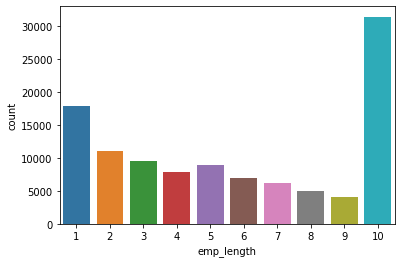

In [54]:
# Plotting the distibution of employement_length of applicants in the dataset
# Most of the applicants have employement length of 1o years or more

z = sns.countplot(x= 'emp_length', data=df1)

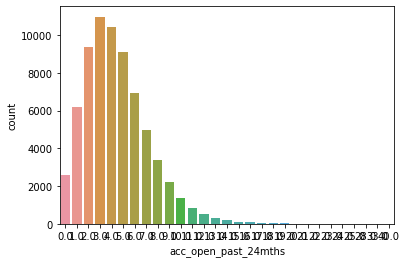

In [55]:
z = sns.countplot(x= 'acc_open_past_24mths', data=df1)

In [56]:
# Using necessary 'Mean', 'Median' or 'Mode' to impute missing values

df1["acc_open_past_24mths"].fillna(df1["acc_open_past_24mths"].mode()[0], inplace = True)

In [57]:
df1["bc_open_to_buy"].fillna((df1["bc_open_to_buy"].mean()), inplace = True)

In [58]:
df1["bc_util"].fillna((df1["bc_util"].mean()), inplace = True)

In [59]:
df1['percent_bc_gt_75'].value_counts(dropna=False)

NaN       39681
100.00    14412
0.00      11722
50.00      8384
66.70      5600
          ...  
0.63          1
95.50         1
0.17          1
0.20          1
10.50         1
Name: percent_bc_gt_75, Length: 120, dtype: int64

In [60]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df1['percent_bc_gt_75'] = imputer.fit_transform(df1['percent_bc_gt_75'].values.reshape(-1, 1))

In [61]:
imputer = KNNImputer(n_neighbors=2)
df1['total_bal_ex_mort'] = imputer.fit_transform(df1['total_bal_ex_mort'].values.reshape(-1, 1))
df1['total_bc_limit'] = imputer.fit_transform(df1['total_bc_limit'].values.reshape(-1, 1))

In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108861 entries, 1117896 to 1939376
Data columns (total 45 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          108861 non-null  object 
 1   loan_amnt                   108861 non-null  float64
 2   term                        108861 non-null  object 
 3   installment                 108861 non-null  float64
 4   grade                       108861 non-null  object 
 5   emp_length                  108861 non-null  int64  
 6   home_ownership              108861 non-null  object 
 7   annual_inc                  108861 non-null  float64
 8   verification_status         108861 non-null  object 
 9   loan_status                 108861 non-null  int64  
 10  pymnt_plan                  108861 non-null  object 
 11  purpose                     108861 non-null  object 
 12  title                       108861 non-null  object 
 13  dti    

In [63]:
# Removing remaining date columns from the dataset. Date variables are not useful for using in model, so can be dropped

df1.drop(['last_pymnt_d','last_credit_pull_d','earliest_cr_line'],axis=1,inplace=True)

In [64]:
df1.drop(['mths_since_recent_bc','num_bc_sats','num_sats'],axis=1,inplace=True)

In [65]:
df1.shape

(108861, 39)

> We have imputed and treated the null values using suitable imputation technique including famous KNN imputer. Now we need to stress on categorical variables. Categorical variables can prove to be of great significance for improving and affecting the model. We will start with perfroming neccessary encoding to convert categorical variable into numerical variable so they can be used in our predictive model.

## 7. Encoding of Categorical variables

In [66]:
# Ordinal variable feature enginnering 
# Data encoding
df1['grade'] = df1['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
df1["home_ownership"] = df1["home_ownership"].map({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1})
df1["emp_length"] = df1["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
df1["emp_length"] = df1["emp_length"].apply(lambda x:int(x))

mapping_dict = {
    'emp_length':{
        '10+ years': 10,
        '9 years': 9,
        '8 years': 8,
        '7 years': 7,
        '6 years': 6,
        '5 years': 5,
        '4 years': 4,
        '3 years': 3,
        '2 years': 2,
        '1 year': 1,
        '< 1 year': 0,
        'n/a': 0
    }
}

#df = df.drop(['last_credit_pull_d','title','earliest_cr_line'], axis=1)
    
df1 = df1.replace(mapping_dict)
df1.head()

print("Current shape of dataset :",df1.shape)
df1.head(2)

Current shape of dataset : (108861, 39)


,id,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,delinq_amnt,mort_acc,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,hardship_flag,fico_average,last_pymnt_yr
1117896,37831144,2500.0,36,83.03,6,10,5,59000.0,Verified,0,...,0.0,0.0,0.0,0.0,0.0,1646.0,2900.0,N,662.0,2014.0
1120851,37167359,6000.0,36,183.87,7,9,6,95000.0,Not Verified,0,...,0.0,3.0,0.0,0.0,0.0,6030.0,63800.0,N,792.0,2014.0


In [67]:
# Using dummy encoding for verification_status column

verification_dummies = pd.get_dummies(df1['verification_status'], drop_first=False)
df1 = pd.concat([df1.drop('verification_status', axis=1), verification_dummies], axis=1)

In [68]:
df1.head(2)

,id,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,loan_status,pymnt_plan,...,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,hardship_flag,fico_average,last_pymnt_yr,Not Verified,Source Verified,Verified
1117896,37831144,2500.0,36,83.03,6,10,5,59000.0,0,n,...,0.0,0.0,1646.0,2900.0,N,662.0,2014.0,0,0,1
1120851,37167359,6000.0,36,183.87,7,9,6,95000.0,0,n,...,0.0,0.0,6030.0,63800.0,N,792.0,2014.0,1,0,0


In [69]:
df1.hardship_flag.value_counts()

N    108861
Name: hardship_flag, dtype: int64

In [70]:
# Since there is only one value 'N' in hardship_flag data, so it is redundant and can be removed

df1.drop(['hardship_flag'],axis=1,inplace=True)

In [71]:
df1.head(2)

,id,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,loan_status,pymnt_plan,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,fico_average,last_pymnt_yr,Not Verified,Source Verified,Verified
1117896,37831144,2500.0,36,83.03,6,10,5,59000.0,0,n,...,0.0,0.0,0.0,1646.0,2900.0,662.0,2014.0,0,0,1
1120851,37167359,6000.0,36,183.87,7,9,6,95000.0,0,n,...,0.0,0.0,0.0,6030.0,63800.0,792.0,2014.0,1,0,0


In [72]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [73]:
df1.head(2)

,id,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,loan_status,pymnt_plan,purpose,title,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,acc_now_delinq,acc_open_past_24mths,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,fico_average,last_pymnt_yr,Not Verified,Source Verified,Verified
1117896,37831144,2500.0,36,83.03,6,10,5,59000.0,0,n,other,Other,2.58,0.0,0.0,5.0,1.0,529.0,18.2,16.0,f,0.0,Individual,0.0,1.0,2371.0,18.2,0.0,0.0,0.0,0.0,0.0,0.0,1646.0,2900.0,662.0,2014.0,0,0,1
1120851,37167359,6000.0,36,183.87,7,9,6,95000.0,0,n,car,Car financing,6.39,0.0,0.0,6.0,0.0,4928.0,7.7,19.0,w,0.0,Individual,0.0,2.0,58872.0,7.7,0.0,0.0,3.0,0.0,0.0,0.0,6030.0,63800.0,792.0,2014.0,1,0,0


In [75]:
# Because there is a lot of levels in this feature, so it is difficult to encode it and hence can be dropped for convenience

df1.drop(['title'],axis=1,inplace=True)

In [76]:
df1.head(2)

,id,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,acc_now_delinq,acc_open_past_24mths,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,fico_average,last_pymnt_yr,Not Verified,Source Verified,Verified
1117896,37831144,2500.0,36,83.03,6,10,5,59000.0,0,n,other,2.58,0.0,0.0,5.0,1.0,529.0,18.2,16.0,f,0.0,Individual,0.0,1.0,2371.0,18.2,0.0,0.0,0.0,0.0,0.0,0.0,1646.0,2900.0,662.0,2014.0,0,0,1
1120851,37167359,6000.0,36,183.87,7,9,6,95000.0,0,n,car,6.39,0.0,0.0,6.0,0.0,4928.0,7.7,19.0,w,0.0,Individual,0.0,2.0,58872.0,7.7,0.0,0.0,3.0,0.0,0.0,0.0,6030.0,63800.0,792.0,2014.0,1,0,0


In [77]:
df1.application_type.value_counts()

Individual    108861
Name: application_type, dtype: int64

In [78]:
# Since, only single application_type, so this column can also be removed

df1.drop(['application_type'],axis=1,inplace=True)

In [79]:
df1.head(2)

,id,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,acc_now_delinq,acc_open_past_24mths,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,fico_average,last_pymnt_yr,Not Verified,Source Verified,Verified
1117896,37831144,2500.0,36,83.03,6,10,5,59000.0,0,n,other,2.58,0.0,0.0,5.0,1.0,529.0,18.2,16.0,f,0.0,0.0,1.0,2371.0,18.2,0.0,0.0,0.0,0.0,0.0,0.0,1646.0,2900.0,662.0,2014.0,0,0,1
1120851,37167359,6000.0,36,183.87,7,9,6,95000.0,0,n,car,6.39,0.0,0.0,6.0,0.0,4928.0,7.7,19.0,w,0.0,0.0,2.0,58872.0,7.7,0.0,0.0,3.0,0.0,0.0,0.0,6030.0,63800.0,792.0,2014.0,1,0,0


In [80]:
# Grouping other purpose apart from debt_consolidation and then using it.
# This is being done to handle the different levels of categories in this column which individually have very low proportion.

df1['purpose'] = df1['purpose'].replace(['credit_card', 'other','home_improvement','small_business','major_purchase','medical','moving','house','vacation','car','renewable_energy','wedding','educational'], 'others')
df1.purpose.value_counts()

debt_consolidation    61190
others                47671
Name: purpose, dtype: int64

In [81]:
df1.pymnt_plan.value_counts()

n    108861
Name: pymnt_plan, dtype: int64

In [82]:
# Since, only single pymnt_plan, so this column can also be removed

df1.drop(['pymnt_plan'],axis=1,inplace=True)

In [83]:
#Dummy encoding for purpose column

verification_dummies = pd.get_dummies(df1['purpose'], drop_first=False)
df1 = pd.concat([df1.drop('purpose', axis=1), verification_dummies], axis=1)

In [84]:
df1.head(2) 

,id,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,acc_now_delinq,acc_open_past_24mths,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,fico_average,last_pymnt_yr,Not Verified,Source Verified,Verified,debt_consolidation,others
1117896,37831144,2500.0,36,83.03,6,10,5,59000.0,0,2.58,0.0,0.0,5.0,1.0,529.0,18.2,16.0,f,0.0,0.0,1.0,2371.0,18.2,0.0,0.0,0.0,0.0,0.0,0.0,1646.0,2900.0,662.0,2014.0,0,0,1,0,1
1120851,37167359,6000.0,36,183.87,7,9,6,95000.0,0,6.39,0.0,0.0,6.0,0.0,4928.0,7.7,19.0,w,0.0,0.0,2.0,58872.0,7.7,0.0,0.0,3.0,0.0,0.0,0.0,6030.0,63800.0,792.0,2014.0,1,0,0,0,1


In [85]:
# #Dummy encoding for initial_list_status column

verification_dummies = pd.get_dummies(df1['initial_list_status'], drop_first=False)
df1 = pd.concat([df1.drop('initial_list_status', axis=1), verification_dummies], axis=1)

In [86]:
df1.head(2)

,id,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,acc_open_past_24mths,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,fico_average,last_pymnt_yr,Not Verified,Source Verified,Verified,debt_consolidation,others,f,w
1117896,37831144,2500.0,36,83.03,6,10,5,59000.0,0,2.58,0.0,0.0,5.0,1.0,529.0,18.2,16.0,0.0,0.0,1.0,2371.0,18.2,0.0,0.0,0.0,0.0,0.0,0.0,1646.0,2900.0,662.0,2014.0,0,0,1,0,1,1,0
1120851,37167359,6000.0,36,183.87,7,9,6,95000.0,0,6.39,0.0,0.0,6.0,0.0,4928.0,7.7,19.0,0.0,0.0,2.0,58872.0,7.7,0.0,0.0,3.0,0.0,0.0,0.0,6030.0,63800.0,792.0,2014.0,1,0,0,0,1,0,1


In [87]:
df1.shape

(108861, 39)

In [88]:
# Taking taget variable 'loan_status' to the end of the dataframe

df1.insert(38, 'loan_status', df1.pop('loan_status'))

In [89]:
df1.head(2)

,id,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,acc_open_past_24mths,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,fico_average,last_pymnt_yr,Not Verified,Source Verified,Verified,debt_consolidation,others,f,w,loan_status
1117896,37831144,2500.0,36,83.03,6,10,5,59000.0,2.58,0.0,0.0,5.0,1.0,529.0,18.2,16.0,0.0,0.0,1.0,2371.0,18.2,0.0,0.0,0.0,0.0,0.0,0.0,1646.0,2900.0,662.0,2014.0,0,0,1,0,1,1,0,0
1120851,37167359,6000.0,36,183.87,7,9,6,95000.0,6.39,0.0,0.0,6.0,0.0,4928.0,7.7,19.0,0.0,0.0,2.0,58872.0,7.7,0.0,0.0,3.0,0.0,0.0,0.0,6030.0,63800.0,792.0,2014.0,1,0,0,0,1,0,1,0


In [90]:
df1.reset_index(drop=True)

,id,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,acc_open_past_24mths,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,fico_average,last_pymnt_yr,Not Verified,Source Verified,Verified,debt_consolidation,others,f,w,loan_status
0,37831144,2500.0,36,83.03,6,10,5,59000.0,2.58,0.0,0.0,5.0,1.0,529.0,18.2,16.0,0.0,0.0,1.0,2371.000000,18.200000,0.0,0.0,0.0,0.000000,0.0,0.0,1646.000000,2900.000000,662.0,2014.0,0,0,1,0,1,1,0,0
1,37167359,6000.0,36,183.87,7,9,6,95000.0,6.39,0.0,0.0,6.0,0.0,4928.0,7.7,19.0,0.0,0.0,2.0,58872.000000,7.700000,0.0,0.0,3.0,0.000000,0.0,0.0,6030.000000,63800.000000,792.0,2014.0,1,0,0,0,1,0,1,0
2,36783260,13000.0,60,344.35,3,7,6,60000.0,25.62,0.0,0.0,8.0,0.0,7420.0,78.1,21.0,0.0,0.0,6.0,636.000000,57.600000,0.0,0.0,1.0,50.000000,0.0,0.0,50327.000000,1500.000000,672.0,2014.0,1,0,0,1,0,0,1,0
3,34442583,18000.0,36,637.19,4,4,5,50000.0,5.52,0.0,2.0,6.0,0.0,4088.0,48.7,14.0,0.0,0.0,8.0,3512.000000,53.800000,0.0,0.0,0.0,25.000000,0.0,0.0,9958.000000,7600.000000,702.0,2014.0,0,1,0,1,0,1,0,0
4,36320945,1000.0,36,34.67,5,1,5,42000.0,11.66,0.0,0.0,7.0,0.0,1875.0,104.2,18.0,0.0,0.0,3.0,0.000000,104.200000,0.0,0.0,0.0,100.000000,0.0,0.0,60260.000000,1800.000000,667.0,2014.0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108856,1063649,17500.0,60,471.10,1,6,6,95000.0,24.78,0.0,1.0,12.0,0.0,23722.0,76.3,23.0,0.0,0.0,3.0,8250.290886,64.962458,0.0,0.0,1.0,51.870002,0.0,0.0,43564.260367,19367.615004,662.0,2012.0,0,0,1,1,0,1,0,1
108857,1061272,8650.0,36,298.38,5,9,5,55000.0,17.61,0.0,3.0,10.0,0.0,8052.0,71.3,10.0,0.0,0.0,3.0,8250.290886,64.962458,0.0,0.0,1.0,51.870002,0.0,0.0,43564.260367,19367.615004,677.0,2014.0,0,0,1,0,1,1,0,0
108858,1062337,12000.0,36,375.49,7,3,6,42000.0,9.83,0.0,0.0,9.0,0.0,14378.0,52.3,14.0,0.0,0.0,3.0,8250.290886,64.962458,0.0,0.0,1.0,51.870002,0.0,0.0,43564.260367,19367.615004,722.0,2013.0,1,0,0,0,1,1,0,0
108859,1062400,20500.0,36,728.54,4,7,5,60000.0,16.40,1.0,3.0,10.0,0.0,15417.0,58.4,20.0,0.0,0.0,3.0,8250.290886,64.962458,0.0,0.0,1.0,51.870002,0.0,0.0,43564.260367,19367.615004,702.0,2014.0,0,1,0,1,0,1,0,0


> After all missing value treatment, necessary impuatation and encoding of categorical variable, our data is now ready to used for building the prediction model. We will start with analysing the loan_status column, try to use equal sample of defaults and non-defaults to remove any bias in the model, the move on to training and testing the model. We will use logistic regression model to predict, because the nature of problem is binary classification in nature.

## 8. Preparing the Model

In [91]:
# Checking defaluts vs non-defaults

df1['loan_status'] = df1['loan_status']
df1['loan_status'].value_counts()

0    84353
1    24508
Name: loan_status, dtype: int64

In [92]:
# Equal sampling of defaults and non-defaults to be added in the model dataset.

loanstatus_0 = df1[df1["loan_status"]==0]
loanstatus_1 = df1[df1["loan_status"]==1]
#subset_of_loanstatus_0 = loanstatus_0.sample(n=247968)
subset_of_loanstatus_0 = loanstatus_0.sample(n=24508)
#subset_of_loanstatus_1 = loanstatus_1.sample(n=247968)
subset_of_loanstatus_1 = loanstatus_1.sample(n=24508)
df1 = pd.concat([subset_of_loanstatus_1, subset_of_loanstatus_0])
df1 = df1.sample(frac=1).reset_index(drop=True)
print("Current shape of dataset :",df1.shape)

df1.head(2)

Current shape of dataset : (49016, 39)


,id,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,acc_open_past_24mths,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,fico_average,last_pymnt_yr,Not Verified,Source Verified,Verified,debt_consolidation,others,f,w,loan_status
0,1255082,10000.0,36,332.72,6,1,5,30000.0,20.24,0.0,0.0,13.0,0.0,8758.0,77.5,24.0,0.0,0.0,3.0,266.0,96.2,0.0,0.0,0.0,100.0,0.0,0.0,46700.0,7000.0,692.0,2014.0,0,1,0,1,0,1,0,0
1,6395732,16425.0,36,595.87,4,1,5,37000.0,21.21,0.0,0.0,12.0,0.0,24346.0,87.3,22.0,0.0,0.0,5.0,2249.0,89.1,0.0,0.0,0.0,100.0,0.0,0.0,34865.0,20600.0,662.0,2014.0,1,0,0,1,0,1,0,1


In [93]:
# Splitting the dataset into train and test (80%/20%)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.iloc[:,:-1], df1.iloc[:,-1], test_size=0.2, random_state=42)
bs_train, bs_test = train_test_split(df1, test_size = 0.2, random_state=42) #just for bootstrapping

X_train.shape

(39212, 38)

In [94]:
# Standardize features:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [95]:
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

> Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data. If a feature has a variance that is orders of magnitude larger than others, It might dominate the objective function and make the estimator unable to learn from other features correctly as expected. Standard scaler standardize features by removing the mean and scaling to unit variance. Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

## 9. Using logistic Regression to Predict

In [96]:
# Applying logistic regression

from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [97]:
# Creating confusion matrix

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[3203, 1639],
       [1734, 3228]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

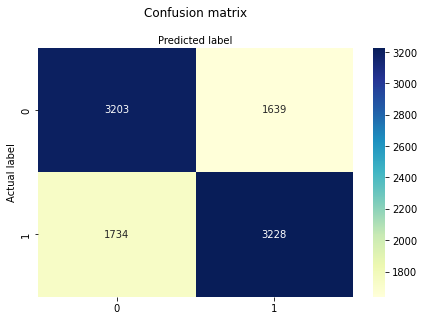

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

>  A confusion matrix is a nxn matrix used to evaluate the performance of a classification model. n is the number of target classes, for e.g. in a binary classification problem, we will have 2x2 matrix. Target variable has two values: Positive or Negative. Columns in the matrix represent actual values of the target variable. Rows represent the predicted values of the target variable. True Positive (TP): The actual value was positive and model predicted a positive value. True Negative (TN): The actual value was negative and model predicted a negative value. False Positive (FP): The actual value was negative but model predicted a positive value, - Type1 error. False Negative (FN): The actual value was positive but model predicted a negative value - Type2 error. Fitting the classifier on each datapoint in the dataset and classifying into each category. Confusion Matrix Accuracy = (TP+TN)/(TP+TN+FP+FN). Precision: How many of the correctly predicted cases actually turned out to be true.  TP/(TP+FP). Recall: How many of the actual cases were we able to predict correctly with our model. TP/(TP+FN). F1-Score: Harmonic mean of Precision and Recall, and gives a combined idea about these two metrics.  2/(1/Recall + 1/Precision)

In [99]:
from sklearn.metrics import classification_report
target_names = ['Default ', 'Not Default ']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Default        0.65      0.66      0.66      4842
Not Default        0.66      0.65      0.66      4962

    accuracy                           0.66      9804
   macro avg       0.66      0.66      0.66      9804
weighted avg       0.66      0.66      0.66      9804



> We can observe that the overall accuracy of the model is 0.60 with precision and recall both almost equal to 0.60. f1-score which takes into consideration both precision and recall (Harmonic mean) is also equal to 0.6. Model is not very effective, And there is a lot of scope to improve the predictability of this model.

In [100]:
copy_df_k=df1.copy()

## 10. Improving the model

In [101]:
# Applying K-fold cross validation to improve the model

from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = copy_df_k.iloc[:,:-1]
y = copy_df_k.iloc[:,-1]

#Implementing cross validation

k = 10
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')

acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    print(X_train.shape,y_train.shape)
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

(44114, 38) (44114,)
(44114, 38) (44114,)
(44114, 38) (44114,)
(44114, 38) (44114,)
(44114, 38) (44114,)
(44114, 38) (44114,)
(44115, 38) (44115,)
(44115, 38) (44115,)
(44115, 38) (44115,)
(44115, 38) (44115,)
accuracy of each fold - [0.6001631986944105, 0.6032231742146063, 0.613015095879233, 0.6109751121991024, 0.6003671970624235, 0.6146470828233375, 0.6268108549275658, 0.6137522954499082, 0.604978575800857, 0.593756376249745]
Avg accuracy : 0.6081688963301188


> K-fold invoves a typical resampling technique. In each set (fold) training and the test would be performed precisely once during this entire process. It helps us to build the model as a generalized one. Based on the K value, the data set would be divided, and train/testing will be conducted in a sequence way equal to K time. During each run, one fold is considered for testing and the rest will be for training. We understand how the data is spread in a way of consistency and will make a conclusion whether to go for the production with this model (or) NOT. 

### Conclusion: 
> Here we used different k-values like intially 5, then 10, but no significant improvement in the model accuracy score could be achieved. So there is a need to use a different sample, or we can experiment to use the dataset of all the years from 2010-2016, while currently we have taken only 2010-2014. We can use some other feature selection techniqies like PCA and some other ensembling techniques to improve the model. This is version-1 of our model. We will apply some other techniques as mentioned above and create a better model in version-2. 